**Biblotecas Utilizadas**

Integrantes:

Mauricio Ariel Galeano Garcia 4517250

Santiago Daniel Schaerer Meza 5811170

Marcos Lorenzo Vera Bower 4991625

In [ ]:
global_vars = globals()

# Delete all global variables
for var in list(global_vars.keys()):
    del global_vars[var]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm

import itertools
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

Importacion del Archivo CSV

In [2]:
Data=pd.read_csv(r'/content/Temp_Asu20092021.csv')

Data['Fecha'] = pd.to_datetime(Data['Fecha'])

Data.set_index('Fecha', inplace=True)

Data = Data.drop(columns=Data.columns[Data.columns.str.strip() == 'Unnamed: 0'])


Visualizacion del Dataframe

In [ ]:
print(Data)

                     Temperatura    Humedad
Fecha                                      
2009-01-01 00:00:00    26.749483  69.609451
2009-01-01 03:00:00    25.956114  78.225166
2009-01-01 06:00:00    23.707357  93.551756
2009-01-01 09:00:00    23.726823  93.394817
2009-01-01 12:00:00    29.606379  72.155839
...                          ...        ...
2021-12-31 09:00:00    21.719499  85.092387
2021-12-31 12:00:00    29.548918  53.780205
2021-12-31 15:00:00    40.026148  27.392646
2021-12-31 18:00:00    41.244712  19.955186
2021-12-31 21:00:00    37.645491  22.674331

[37984 rows x 2 columns]


Limpieza de Datos

In [3]:
Data.dropna()
Data['Humedad'] = Data['Humedad'].apply(lambda x: 100 if x > 100 else x)


Grafico de Temperatura vs. Tiempo

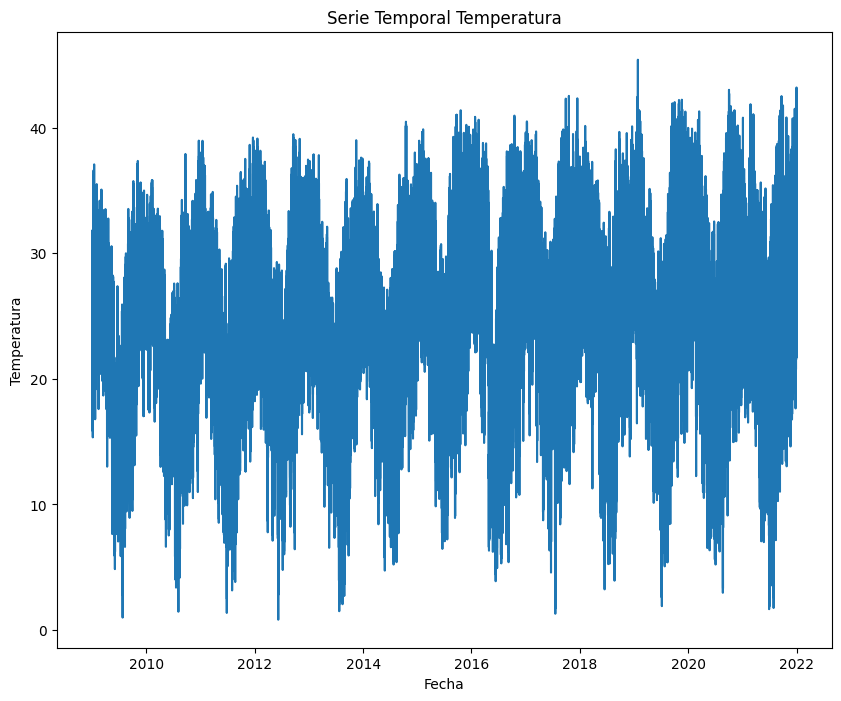

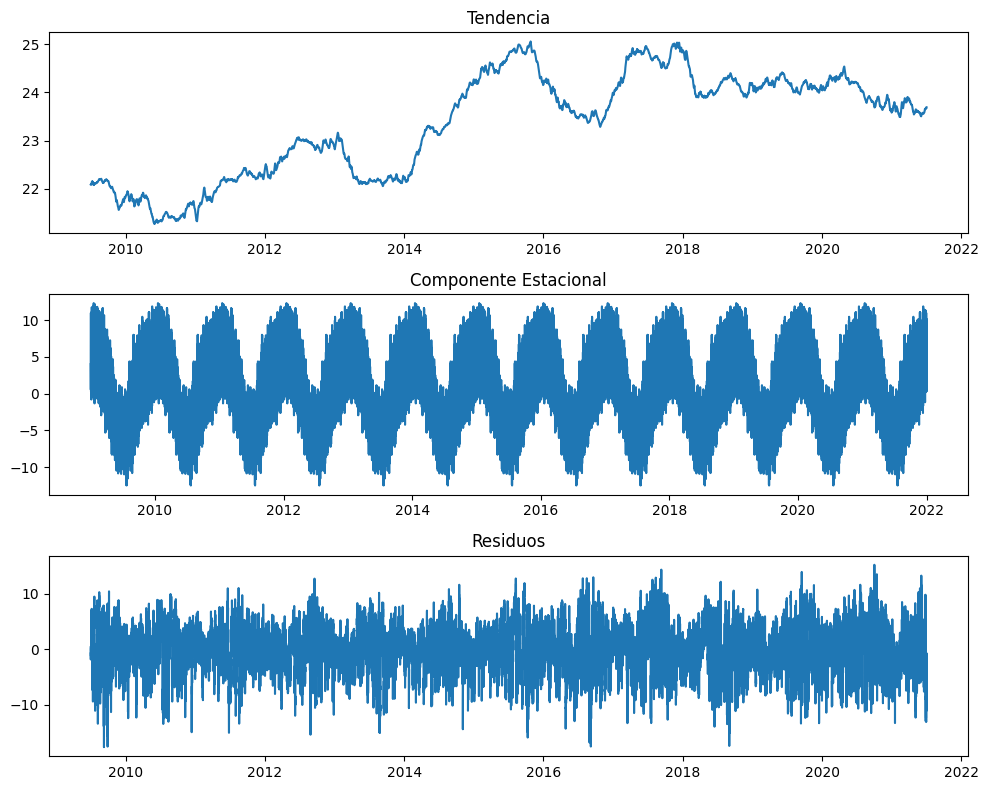

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(Data.index, Data['Temperatura'], label='Serie Temporal Original')
plt.title('Serie Temporal Temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
#plt.legend()
plt.show()
# Descomposición estacional
result = seasonal_decompose(Data['Temperatura'], model='additive', period=365*8)  # Asumiendo un período estacional de 365 días

# Visualizar los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Tendencia')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Componente Estacional')

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()

Grafico de Humedad vs. Tiempo

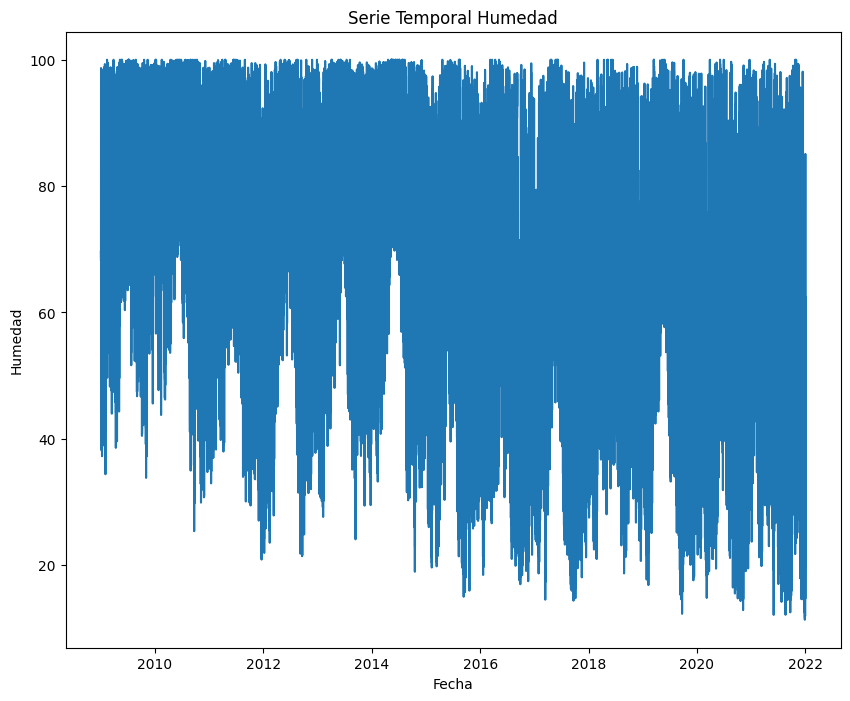

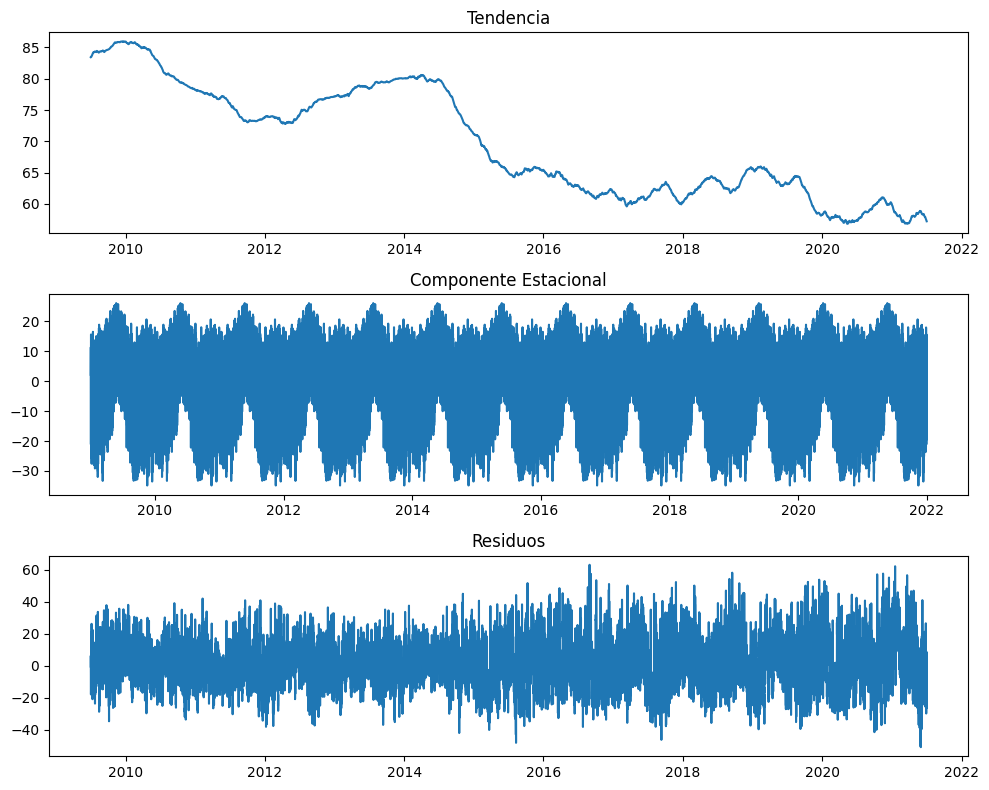

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(Data.index, Data['Humedad'], label='Serie Temporal Original')
plt.title('Serie Temporal Humedad')
plt.xlabel('Fecha')
plt.ylabel('Humedad')
#plt.legend()
plt.show()
# Descomposición estacional
result = seasonal_decompose(Data['Humedad'], model='additive', period=365*8)  # Asumiendo un período estacional de 365 días

# Visualizar los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Tendencia')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Componente Estacional')

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()

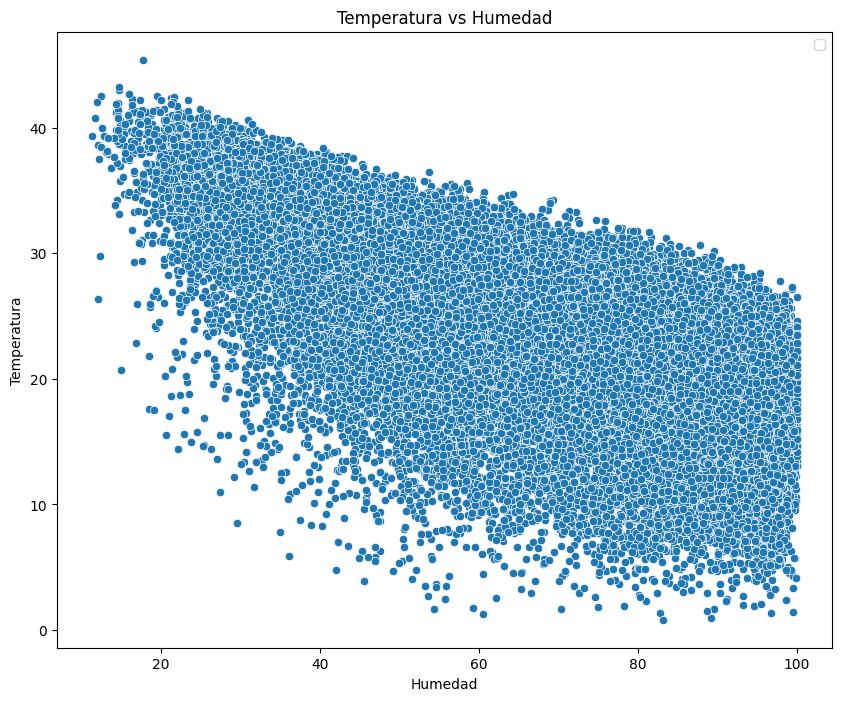

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Data, y=Data['Temperatura'], x=Data['Humedad'])
plt.title('Temperatura vs Humedad')
plt.xlabel('Humedad')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


Grafico Temporal de Temperatura y Humedad

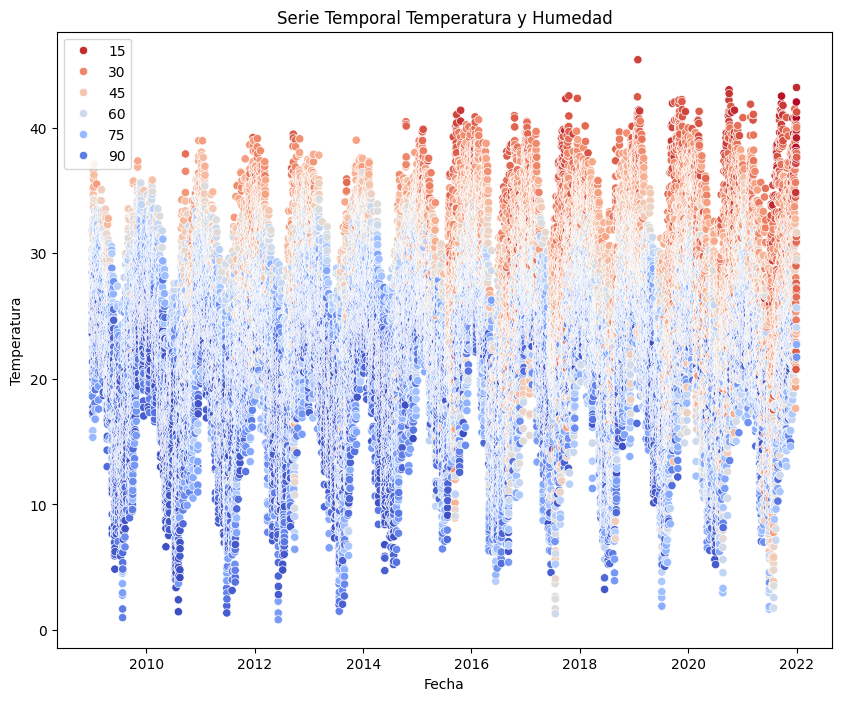

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Data, y=Data['Temperatura'], x=Data.index,hue=Data['Humedad'],palette='coolwarm_r')
plt.title('Serie Temporal Temperatura y Humedad')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


Temperatura Promedio Dia, Semana, Mes

In [5]:
TempPromDia=Data['Temperatura'].resample('D').mean()
TempPromSemana=Data['Temperatura'].resample('W').mean()
TempPromMes=Data['Temperatura'].resample('M').mean()

TempMaxDia=Data['Temperatura'].resample('D').max()
TempMaxSemana=Data['Temperatura'].resample('W').max()
TempMaxMes=Data['Temperatura'].resample('M').max()


Separacion del Dataset para entrenamiento

In [13]:
TrainDia=TempPromDia.loc[:'2019-12-31']
TrainSemana=TempPromSemana.loc[:'2019-12-31']
TrainMes=TempPromMes.loc[:'2019-12-31']
TestDia=TempPromDia.loc['2020-01-01':]
TestSemana=TempPromSemana.loc['2020-01-01':]
TestMes=TempPromMes.loc['2020-01-01':]

#TrainDia=TempMaxDia.loc[:'2019-12-31']
#TrainSemana=TempMaxSemana.loc[:'2019-12-31']
#TrainMes=TempMaxMes.loc[:'2019-12-31']
#TestDia=TempMaxDia.loc['2020-01-01':]
#TestSemana=TempMaxSemana.loc['2020-01-01':]
#TestMes=TempMaxMes.loc['2020-01-01':]


indexDia=TrainDia.index
indexSemana=TrainSemana.index
indexMes=TrainMes.index

scaler=RobustScaler()
SDV=scaler.fit_transform(TrainDia.values.reshape(-1,1))
SSV=scaler.fit_transform(TrainSemana.values.reshape(-1,1))
SMV=scaler.fit_transform(TrainMes.values.reshape(-1,1))

STrainDia = pd.DataFrame(SDV, index=indexDia, columns=['TempScaled'])
STrainSemana = pd.DataFrame(SSV, index=indexSemana, columns=['TempScaled'])
STrainMes = pd.DataFrame(SMV, index=indexMes, columns=['TempScaled'])

#print(STrainDia)

Graficos ACF y PACF para determinar valores de p y q

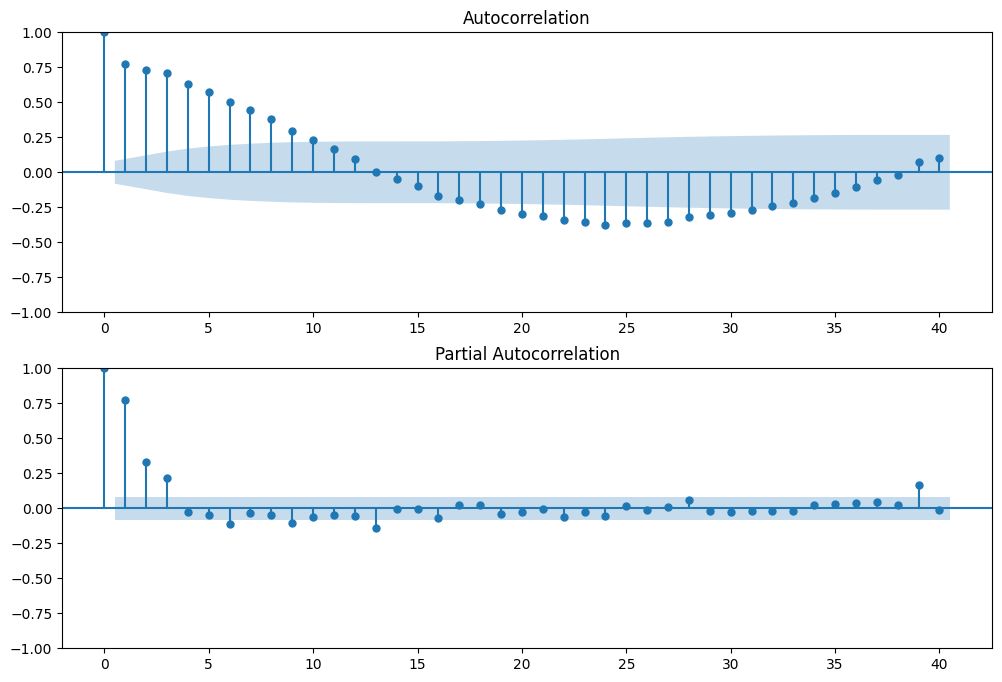

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(TrainSemana, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(TrainSemana, lags=40, ax=ax2)

plt.show()

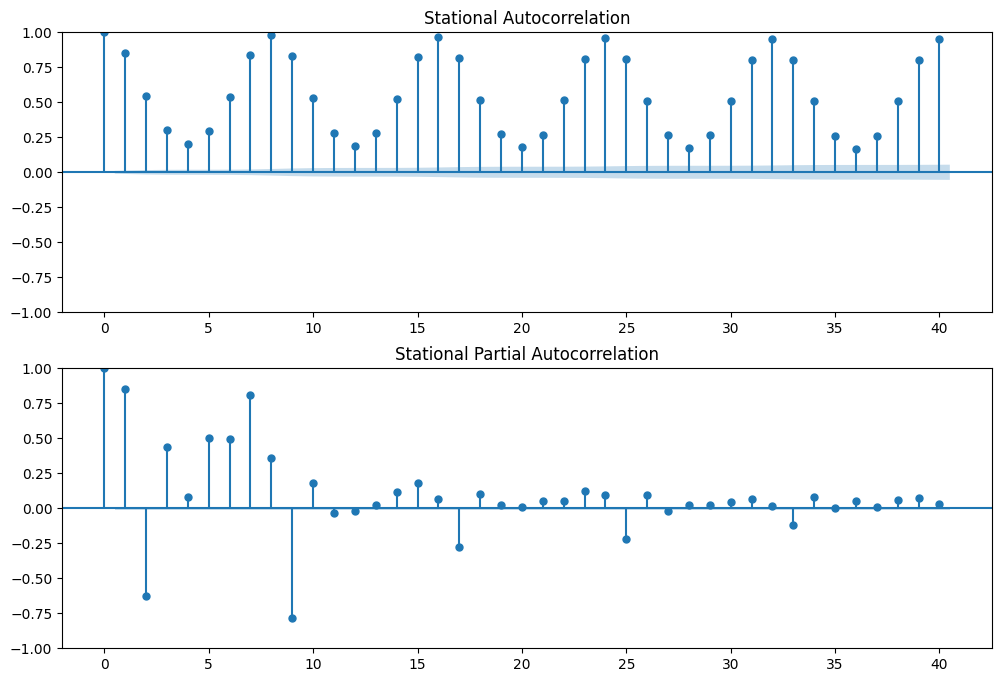

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(result.seasonal, lags=40, ax=ax1)
ax1.set_title('Stational Autocorrelation')
sm.graphics.tsa.plot_pacf(result.seasonal, lags=40, ax=ax2)

plt.title('Stational Partial Autocorrelation')
plt.show()

Modelo Sarimax Dia

In [ ]:
 SarimaxDia = sm.tsa.SARIMAX(TrainDia, order=(1, 0, 1), seasonal_order=(1,0,1,365))
fitDia = SarimaxDia.fit()
PredDia = fitDia.predict(start='2020-01-01', end='2021-12-31')

Modelo Sarimax Semana

In [36]:
SarimaxSemana = sm.tsa.SARIMAX(TrainSemana, order=(1, 0, 2), seasonal_order=(1,0,1,52))
fitSemana = SarimaxSemana.fit()
PredSemana = fitSemana.predict(start='2020-01-01', end='2021-12-31')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Modelo Sarimax Semana Scaled

In [39]:
SarimaxSemanaScaled = sm.tsa.SARIMAX(STrainSemana, order=(2, 0, 1), seasonal_order=(1,0,1,52))
fitSemanaScaled = SarimaxSemanaScaled.fit()
PredSemanaScaled = fitSemanaScaled.predict(start='2020-01-01', end='2021-12-31')


In [40]:
PSST= scaler.inverse_transform(PredSemanaScaled.values.reshape(-1,1))
PredSemanaScaledT = pd.DataFrame(PSST, index=TestSemana.index, columns=['TempScaled'])
#print(PredSemanaScaledT)

Prediccion Mes

In [ ]:
SarimaxMes = sm.tsa.SARIMAX(TrainMes, order=(1, 0, 1), seasonal_order=(1,0,1,12))
fitMes = SarimaxMes.fit()
PredMes = fitMes.predict(start='2020-01-01', end='2021-12-31')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Prediccion Semanal Multivariado

In [18]:
exog=Data['Humedad'].loc[:'2019-12-31'].resample('W').mean().iloc[:-1]
fhumidity=Data['Humedad'].loc['2020-01-01':].resample('W').mean()
#print(exog)
#print(TrainSemana)
#print(fhumidity)

In [41]:
SarimaxSemana = sm.tsa.SARIMAX(TrainSemana,exog=exog, order=(2, 0, 2), seasonal_order=(1,0,1,52))
fitSemana = SarimaxSemana.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
SarimaxSemanaScaled = sm.tsa.SARIMAX(STrainSemana,exog=exog, order=(1, 0, 2), seasonal_order=(1,0,1,52))
fitSemanaScaled = SarimaxSemanaScaled.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
forecast = fitSemana.forecast(steps=105, exog=fhumidity)


In [ ]:
forecastscaled=fitSemanaScaled.forecast(steps=105,exog=fhumidity)

In [ ]:
PSSMT= scaler.inverse_transform(forecastscaled.values.reshape(-1,1))
PredSemanaScaledMT = pd.DataFrame(PSSMT, index=TestSemana.index, columns=['TempScaled'])

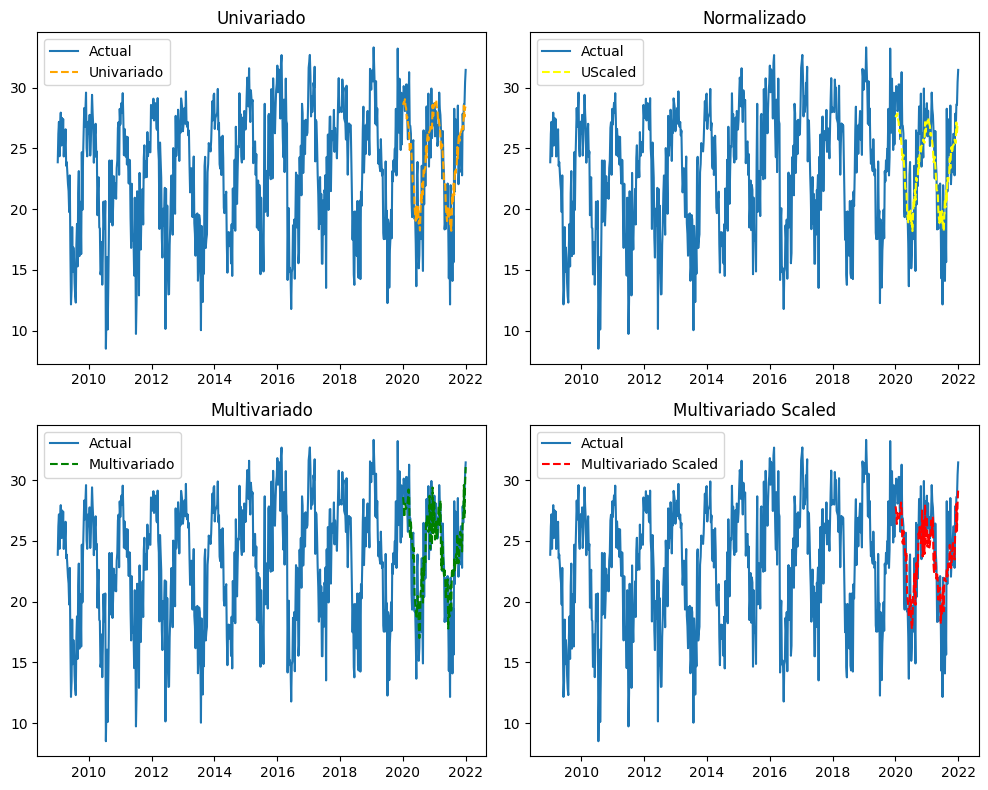

In [ ]:

plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.plot(TempPromSemana, label='Actual')
plt.plot(PredSemana, color='orange', linestyle='--', label='Univariado')
plt.title('Univariado')
plt.legend()

plt.subplot(222)
plt.plot(TempPromSemana, label='Actual')
plt.plot(PredSemanaScaledT, color='yellow', linestyle='--', label='UScaled')
plt.title('Normalizado')
plt.legend()

plt.subplot(223)
plt.plot(TempPromSemana, label='Actual')
plt.plot(forecast, color='green', linestyle='--', label='Multivariado')
plt.title('Multivariado')
plt.legend()

plt.subplot(224)
plt.plot(TempPromSemana, label='Actual')
plt.plot(PredSemanaScaledMT, color='red', linestyle='--', label='Multivariado Scaled')
plt.title('Multivariado Scaled')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
r2Semana=r2_score(TestSemana,PredSemana)
#r2SemanaS=r2_score(TestSemana,PredSemanaScaledT)
r2SemanaM=r2_score(TestSemana,forecast)
#r2SemanaMS=r2_score(TestSemana,PredSemanaScaledMT)
print(r2Semana)
#print(r2SemanaS)
print(r2SemanaM)
#print(r2SemanaMS)

0.5639766947235187
0.6231655313463789
